In [ ]:
from google.colab import files
uploaded = files.upload()

Saving parkinsons2.csv to parkinsons2.csv


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn import preprocessing
from sklearn.model_selection import KFold

In [ ]:
import io
parkinson_df= pd.read_csv(io.BytesIO(uploaded['parkinsons2.csv']))

In [ ]:
parkinson_df.head().transpose()


,0,1,2,3,4
MDVP:Fo(Hz),119.992000,122.400000,116.682000,116.676000,116.014000
MDVP:Fhi(Hz),157.302000,148.650000,131.111000,137.871000,141.781000
MDVP:Flo(Hz),74.997000,113.819000,111.555000,111.366000,110.655000
MDVP:Jitter(%),0.007840,0.009680,0.010500,0.009970,0.012840
MDVP:Jitter(Abs),0.000070,0.000080,0.000090,0.000090,0.000110
MDVP:RAP,0.003700,0.004650,0.005440,0.005020,0.006550
MDVP:PPQ,0.005540,0.006960,0.007810,0.006980,0.009080
Jitter:DDP,0.011090,0.013940,0.016330,0.015050,0.019660
MDVP:Shimmer,0.043740,0.061340,0.052330,0.054920,0.064250
MDVP:Shimmer(dB),0.426000,0.626000,0.482000,0.517000,0.584000


In [ ]:
X = parkinson_df
X=X.replace([np.inf, -np.inf], np.nan).fillna(value=0)
scaler = MinMaxScaler()
scaler.fit(X)
X=scaler.transform(X)


In [ ]:
parkinson_df.columns

Index(['MDVP:Fo(Hz)', 'MDVP:Fhi(Hz)', 'MDVP:Flo(Hz)', 'MDVP:Jitter(%)',
       'MDVP:Jitter(Abs)', 'MDVP:RAP', 'MDVP:PPQ', 'Jitter:DDP',
       'MDVP:Shimmer', 'MDVP:Shimmer(dB)', 'Shimmer:APQ3', 'Shimmer:APQ5',
       'MDVP:APQ', 'Shimmer:DDA', 'NHR', 'HNR', 'RPDE', 'DFA', 'spread1',
       'spread2', 'D2', 'PPE', 'status'],
      dtype='object')

In [ ]:
parkinson_df.shape

(195, 23)

In [ ]:
parkinson_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 23 columns):
MDVP:Fo(Hz)         195 non-null float64
MDVP:Fhi(Hz)        195 non-null float64
MDVP:Flo(Hz)        195 non-null float64
MDVP:Jitter(%)      195 non-null float64
MDVP:Jitter(Abs)    195 non-null float64
MDVP:RAP            195 non-null float64
MDVP:PPQ            195 non-null float64
Jitter:DDP          195 non-null float64
MDVP:Shimmer        195 non-null float64
MDVP:Shimmer(dB)    195 non-null float64
Shimmer:APQ3        195 non-null float64
Shimmer:APQ5        195 non-null float64
MDVP:APQ            195 non-null float64
Shimmer:DDA         195 non-null float64
NHR                 195 non-null float64
HNR                 195 non-null float64
RPDE                195 non-null float64
DFA                 195 non-null float64
spread1             195 non-null float64
spread2             195 non-null float64
D2                  195 non-null float64
PPE                 195 non-null f

In [ ]:
parkinson_df.describe().transpose()


,count,mean,std,min,25%,50%,75%,max
MDVP:Fo(Hz),195.0,154.228641,41.390065,88.333000,117.572000,148.790000,182.769000,260.105000
MDVP:Fhi(Hz),195.0,197.104918,91.491548,102.145000,134.862500,175.829000,224.205500,592.030000
MDVP:Flo(Hz),195.0,116.324631,43.521413,65.476000,84.291000,104.315000,140.018500,239.170000
MDVP:Jitter(%),195.0,0.006220,0.004848,0.001680,0.003460,0.004940,0.007365,0.033160
MDVP:Jitter(Abs),195.0,0.000044,0.000035,0.000007,0.000020,0.000030,0.000060,0.000260
MDVP:RAP,195.0,0.003306,0.002968,0.000680,0.001660,0.002500,0.003835,0.021440
MDVP:PPQ,195.0,0.003446,0.002759,0.000920,0.001860,0.002690,0.003955,0.019580
Jitter:DDP,195.0,0.009920,0.008903,0.002040,0.004985,0.007490,0.011505,0.064330
MDVP:Shimmer,195.0,0.029709,0.018857,0.009540,0.016505,0.022970,0.037885,0.119080
MDVP:Shimmer(dB),195.0,0.282251,0.194877,0.085000,0.148500,0.221000,0.350000,1.302000


In [ ]:
parkinson_df[parkinson_df.isnull().any(axis=1)]


,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE,status


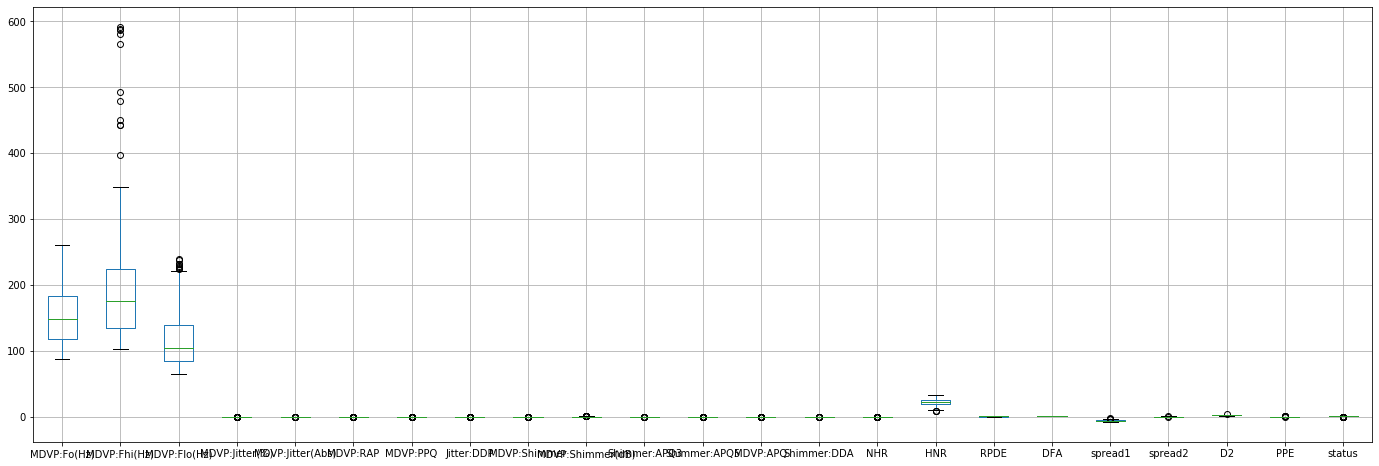

In [ ]:
parkinson_df.boxplot(figsize=(24,8))


In [ ]:
parkinson_df.corr()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE,status
MDVP:Fo(Hz),1.000000,0.400985,0.596546,-0.118003,-0.382027,-0.076194,-0.112165,-0.076213,-0.098374,-0.073742,-0.094717,-0.070682,-0.077774,-0.094732,-0.021981,0.059144,-0.383894,-0.446013,-0.413738,-0.249450,0.177980,-0.372356,-0.383535
MDVP:Fhi(Hz),0.400985,1.000000,0.084951,0.102086,-0.029198,0.097177,0.091126,0.097150,0.002281,0.043465,-0.003743,-0.009997,0.004937,-0.003733,0.163766,-0.024893,-0.112404,-0.343097,-0.076658,-0.002954,0.176323,-0.069543,-0.166136
MDVP:Flo(Hz),0.596546,0.084951,1.000000,-0.139919,-0.277815,-0.100519,-0.095828,-0.100488,-0.144543,-0.119089,-0.150747,-0.101095,-0.107293,-0.150737,-0.108670,0.210851,-0.400143,-0.050406,-0.394857,-0.243829,-0.100629,-0.340071,-0.380200
MDVP:Jitter(%),-0.118003,0.102086,-0.139919,1.000000,0.935714,0.990276,0.974256,0.990276,0.769063,0.804289,0.746625,0.725561,0.758255,0.746635,0.906959,-0.728165,0.360673,0.098572,0.693577,0.385123,0.433434,0.721543,0.278220
MDVP:Jitter(Abs),-0.382027,-0.029198,-0.277815,0.935714,1.000000,0.922911,0.897778,0.922913,0.703322,0.716601,0.697153,0.648961,0.648793,0.697170,0.834972,-0.656810,0.441839,0.175036,0.735779,0.388543,0.310694,0.748162,0.338653
MDVP:RAP,-0.076194,0.097177,-0.100519,0.990276,0.922911,1.000000,0.957317,1.000000,0.759581,0.790652,0.744912,0.709927,0.737455,0.744919,0.919521,-0.721543,0.342140,0.064083,0.648328,0.324407,0.426605,0.670999,0.266668
MDVP:PPQ,-0.112165,0.091126,-0.095828,0.974256,0.897778,0.957317,1.000000,0.957319,0.797826,0.839239,0.763580,0.786780,0.804139,0.763592,0.844604,-0.731510,0.333274,0.196301,0.716489,0.407605,0.412524,0.769647,0.288698
Jitter:DDP,-0.076213,0.097150,-0.100488,0.990276,0.922913,1.000000,0.957319,1.000000,0.759555,0.790621,0.744894,0.709907,0.737439,0.744901,0.919548,-0.721494,0.342079,0.064026,0.648328,0.324377,0.426556,0.671005,0.266646
MDVP:Shimmer,-0.098374,0.002281,-0.144543,0.769063,0.703322,0.759581,0.797826,0.759555,1.000000,0.987258,0.987625,0.982835,0.950083,0.987626,0.722194,-0.835271,0.447424,0.159954,0.654734,0.452025,0.507088,0.693771,0.367430
MDVP:Shimmer(dB),-0.073742,0.043465,-0.119089,0.804289,0.716601,0.790652,0.839239,0.790621,0.987258,1.000000,0.963198,0.973751,0.960977,0.963202,0.744477,-0.827805,0.410684,0.165157,0.652547,0.454314,0.512233,0.695058,0.350697


In [ ]:
parkinson_df['status'].value_counts().sort_index()


0     48
1    147
Name: status, dtype: int64

In [ ]:
X = parkinson_df.drop(['MDVP:Fhi(Hz)','NHR','status'],axis=1)
Y = parkinson_df['status']

In [ ]:
#Splitting the data into train and test in 70/30 ratio with random state as 2.
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=2)

In [ ]:
LR = LogisticRegression()
LR.fit(X_train, Y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
Y1_predict = LR.predict(X_test)
Y1_predict

array([1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1])

In [ ]:
Y_acc = metrics.accuracy_score(Y_test,Y1_predict)
print("Accuracy of the model is {0:2f}".format(Y_acc*100))
Y_cm=metrics.confusion_matrix(Y_test,Y1_predict)
print(Y_cm)

Accuracy of the model is 81.355932
[[ 4  8]
 [ 3 44]]


In [ ]:
#Sensitivity
TPR=Y_cm[1,1]/(Y_cm[1,0]+Y_cm[1,1])
print("Sensitivity of the model is {0:2f}".format(TPR))

Sensitivity of the model is 0.936170


In [ ]:
#Specificity
TNR=Y_cm[0,0]/(Y_cm[0,0]+Y_cm[0,1])
print("Specificity of the model is {0:2f}".format(TNR))

Specificity of the model is 0.333333


In [ ]:
Y_CR=metrics.classification_report(Y_test,Y1_predict)
print(Y_CR)

              precision    recall  f1-score   support

           0       0.57      0.33      0.42        12
           1       0.85      0.94      0.89        47

    accuracy                           0.81        59
   macro avg       0.71      0.63      0.65        59
weighted avg       0.79      0.81      0.79        59



Area under the curve for the given model is 0.634752


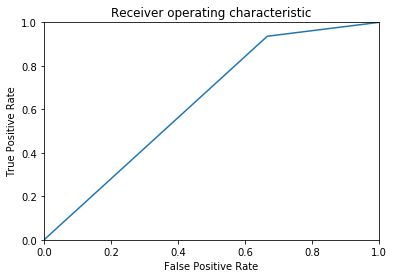

In [ ]:
fpr,tpr, _ = roc_curve(Y_test, Y1_predict)
roc_auc = auc(fpr, tpr)

print("Area under the curve for the given model is {0:2f}".format(roc_auc))
plt.figure()
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.show()

In [ ]:
X = parkinson_df.drop(['MDVP:Fhi(Hz)','NHR','status'],axis=1)
Y = parkinson_df['status']

In [ ]:
# K-fold cross validation for the given model:
#Since the dataset contains 197 rows, we are taking the number of splits as 3
kf=KFold(n_splits=3,shuffle=True,random_state=2)
acc=[]
for train,test in kf.split(X,Y):
    M=LogisticRegression()
    Xtrain,Xtest=X.iloc[train,:],X.iloc[test,:]
    Ytrain,Ytest=Y[train],Y[test]
    M.fit(Xtrain,Ytrain)
    Y_predict=M.predict(Xtest)
    acc.append(metrics.accuracy_score(Ytest,Y_predict))
    print(metrics.confusion_matrix(Ytest,Y_predict))
    print(metrics.classification_report(Ytest,Y_predict))
print("Cross-validated Score:{0:2f} ".format(np.mean(acc)))

[[ 7  8]
 [ 3 47]]
              precision    recall  f1-score   support

           0       0.70      0.47      0.56        15
           1       0.85      0.94      0.90        50

    accuracy                           0.83        65
   macro avg       0.78      0.70      0.73        65
weighted avg       0.82      0.83      0.82        65

[[ 5  8]
 [ 0 52]]
              precision    recall  f1-score   support

           0       1.00      0.38      0.56        13
           1       0.87      1.00      0.93        52

    accuracy                           0.88        65
   macro avg       0.93      0.69      0.74        65
weighted avg       0.89      0.88      0.85        65

[[15  5]
 [ 3 42]]
              precision    recall  f1-score   support

           0       0.83      0.75      0.79        20
           1       0.89      0.93      0.91        45

    accuracy                           0.88        65
   macro avg       0.86      0.84      0.85        65
weighted avg     

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Accuracy for each fold

In [ ]:
acc

[0.8307692307692308, 0.8769230769230769, 0.8769230769230769]

#Error

In [ ]:
error=1-np.array(acc)
error

array([0.16923077, 0.12307692, 0.12307692])

Variance Error of the model

In [ ]:
np.var(error,ddof=1)

0.0007100591715976316